# Laboratorio 3: Modelos lineales

Integrantes: **Juan Pablo Bustamante**


## Instrucciones

1.  Trabajen en equipos de dos personas.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

In [76]:
%matplotlib inline

## Dataset sintético

Simulamos un dataset con datos aleatorios, siguiendo una distribución uniforme $\mathcal{U}_{(0,1)}$.

In [77]:
from numpy import random
n = 1000
X = random.rand(n, 2)
X[:5]

array([[0.2357898 , 0.30922092],
       [0.27109086, 0.49008873],
       [0.08634257, 0.69461682],
       [0.09142145, 0.78269996],
       [0.92838682, 0.691907  ]])

Crearemos el siguiente modelo inicial: $Y = 3 X_1 - 2 X_2^2 + \epsilon$.

Necesitaremos aproximar $Y$ usando los descriptores $X_1$ y $X_2$.

$\epsilon $~$ \mathcal{U}_{(0,1)}$ es una fuente de ruido que no podemos controlar para la predicción.

In [78]:
y = X[:, 0] * 3 - 2 * X[:, 1] ** 2 + random.rand(n)
y[:5]

array([ 1.09385726,  1.17830159, -0.33074035, -0.42295206,  2.66610582])

## Parte 1: División en bases de datos de entrenamiento y de prueba

Necesitamos probar nuestro modelo en una base de datos diferente a la utilizada para el entrenamiento **para medir su capacidad de generalización**.

Queremos que el modelo aprenda la ley $3 X_1 - 2 X_2^2$ y el **sobreaprendizaje equivaldría a memorizar el vector de ruido $\epsilon$**, que solo corresponde a variaciones en $Y$ independientes de nuestro modelo.

Usar [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

1. Separar los datos en conjuntos de entrenamiento y prueba, con un 75% y 25% de los datos respectivamente.

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 2) (250, 2) (750,) (250,)


## Parte 2: Regresión Lineal

Encontrar los parámetros $\theta = \begin{pmatrix}
           \theta_{1} \\
           \theta_{2}
         \end{pmatrix}$ solución de $\underset{\theta}{\arg\min} \sum_{i=1}^{n}|Y_i-f_{\theta}(\mathbf{X}_i)|^2$
         
Donde $f_{\theta}(\mathbf{X}) = \theta_0 + \sum_{d=1}^{D}\theta_d X_d$ (en nuestro caso $D=2$)

Calcular el coeficiente $R^2$.
$$R^2=1-\frac{\sum_{i=1}^{n}|Y_i-f(\mathbf{X}_i)|^2}{\sum_{i=1}^{n}|Y_i-\overline{Y}|^2}$$

Donde $\mathbf{X} = \begin{pmatrix}
           X_{1} \\
           X_{2}
         \end{pmatrix}$ y $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_i$

2. Entrene un modelo de regresión lineal con los datos.

Use : [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


In [80]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


3. Imprima los primeros 5 valores de y_test, y los 5 primeros valores predichos por el modelo.

In [81]:
y_pred = reg.predict(X_test)
print("y_test:", y_test[:5])


y_test: [ 2.234078    1.33580519 -0.78987298  2.14553259  2.41374803]


In [82]:
print("y_pred:", y_pred[:5])

y_pred: [ 1.75902914  0.76693569 -0.53474329  2.40950151  2.38707071]


4. ¿Cuál es el coeficiente $R^2$ del modelo?

Use [r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [83]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.923317828527037


## Parte 3: mejorar el modelo aplicando una transformación bien elegida

El modelo inicial es: $Y = 3 X_1 - 2 X_2^2 + \epsilon$. Añadiremos coeficientes polinomiales con [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

El conjunto de descriptores inicial $\mathbf{X} = \begin{pmatrix} X_{1} \\ X_{2} \end{pmatrix}$
se convertirá ahora en $\mathbf{X} = \begin{pmatrix} 1 \\ X_{1} \\ X_{2} \\ X_{1}^2 \\ X_{1}X_{2} \\ X_{2}^2 \end{pmatrix}$ lo que deja:

$$f_{\theta}(\mathbf{X}) = \theta'_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_1^2 + \theta_4 X_1X_2 + \theta_5 X_2^2$$

5. Genere un conjunto de descriptores `X_train2` con `PolynomialFeatures()` usando el parámetro `degree=2`

In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.transform(X_test)

6. Imprima los primeros 5 valores de `X_train` y de `X_train2`

In [85]:
print("X_train[:5]:\n", X_train[:5])

X_train[:5]:
 [[0.46522597 0.99791525]
 [0.38115138 0.27304532]
 [0.450747   0.46883983]
 [0.47950306 0.55253287]
 [0.52271192 0.22747249]]


In [86]:
print("X_train2[:5]:\n", X_train2[:5])

X_train2[:5]:
 [[1.         0.46522597 0.99791525 0.2164352  0.46425609 0.99583485]
 [1.         0.38115138 0.27304532 0.14527638 0.1040716  0.07455375]
 [1.         0.450747   0.46883983 0.20317286 0.21132815 0.21981078]
 [1.         0.47950306 0.55253287 0.22992318 0.2649412  0.30529258]
 [1.         0.52271192 0.22747249 0.27322776 0.11890259 0.05174374]]


7. Entrene el modelo de regresión lineal con PolynomialFeatures. ¿Cuál es su coeficiente $R^2$?

In [87]:
reg2 = LinearRegression()
reg2.fit(X_train2, y_train)
y_pred2 = reg2.predict(X_test2)
r2_2 = r2_score(y_test, y_pred2)
print("R^2 con PolynomialFeatures:", r2_2)

R^2 con PolynomialFeatures: 0.9391286157734334


## Parte 4: Entrenar un modelo random forest

Use: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

8. Entrene un modelo de regresión Random Forest sobre los datos (sin PolynomialFeatures)

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


9. ¿Cuál es su coeficiente $R^2$?

In [89]:
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("R^2 Random Forest:", r2_rf)

R^2 Random Forest: 0.9206103103851568


10. Entrene un modelo `RandomForest` con `PolynomialFeatures` y `degree=2`

In [90]:
rf2 = RandomForestRegressor(random_state=42)
rf2.fit(X_train2, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Parte 5: Comparemos los modelos

Compararemos los modelos con los datos iniciales y datos nuevos.

Los datos nuevos representan la misma función en otro rango. Estos se generan con $X_1, X_2$ ~ $\mathcal{U}_{(0.5,1.5)}$

In [91]:
X_test2 = random.rand(n, 2) + 0.5
y_test2 = X_test2[:, 0] * 3 - 2 * X_test2[:, 1] ** 2 + random.rand(n)

11. Genere una tabla (un DataFrame de pandas) que muestre para cada uno de los 4 modelos entrenados, los coeficientes $R^2$ al predecir los datos iniciales, y los coeficientes al predecir los datos generados en la celda anterior.

In [92]:
import pandas as pd

# Para los datos nuevos
X_test2_new = poly.transform(X_test2)
y_pred_reg2_new = reg2.predict(X_test2_new)
y_pred_rf2_new = rf2.predict(X_test2_new)

# Para los datos iniciales
models = [reg, reg2, rf, rf2]
names = ["Linear", "PolyLinear", "RandomForest", "PolyRandomForest"]
r2_initial = [
    r2_score(y_test, reg.predict(X_test)),
    r2_score(y_test, reg2.predict(poly.transform(X_test))),
    r2_score(y_test, rf.predict(X_test)),
    r2_score(y_test, rf2.predict(poly.transform(X_test)))
]
r2_new = [
    r2_score(y_test2, reg.predict(X_test2)),
    r2_score(y_test2, reg2.predict(poly.transform(X_test2))),
    r2_score(y_test2, rf.predict(X_test2)),
    r2_score(y_test2, rf2.predict(poly.transform(X_test2)))
]
df = pd.DataFrame({
    "Modelo": names,
    "R2_test": r2_initial,
    "R2_test2": r2_new
})
print(df)

             Modelo   R2_test  R2_test2
0            Linear  0.923318  0.701972
1        PolyLinear  0.939129  0.957860
2      RandomForest  0.920610  0.492155
3  PolyRandomForest  0.922090  0.488663


12. ¿Cuál modelo tiene el mejor desempeño? ¿Por qué un modelo generaliza mejor que el resto?

13. ¿Cuáles son los coeficientes aprendidos por el modelo de regresión lineal con PolynomicFeatures?

In [93]:
print("Coeficientes:", reg2.coef_)
print("Intercepto:", reg2.intercept_)
print("Nombres de features:", poly.get_feature_names_out())

Coeficientes: [ 0.          2.95157539 -0.05002496  0.14574571 -0.23827774 -1.77654512]
Intercepto: 0.4654063383853707
Nombres de features: ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


## Parte 6: Visualizando el sobreajuste con un árbol de decisión

A medida que aumenta la complejidad del modelo, se produce de nuevo un sobreajuste. De igual forma, el modelo que utiliza solo $X_1$ y $X_2$ no está necesariamente adaptado al problema y presenta un caso de subaprendizaje.

Para el primer conjunto de datos {X_train, y_train},

14. Entrene un **Arbol de Decisión** con el argumento `max_depth`= 1...20. Para cada uno, guarde su coeficiente $R^2$ al predecir el conjunto de entrenamiento, y al predecir el conjunto de prueba.

In [94]:
from sklearn.tree import DecisionTreeRegressor

res = []
for md in range(1, 21):
    tree = DecisionTreeRegressor(max_depth=md, random_state=42)
    tree.fit(X_train, y_train)
    r2_train = r2_score(y_train, tree.predict(X_train))
    r2_test = r2_score(y_test, tree.predict(X_test))
    res.append({"max_depth": md, "R2_train": r2_train, "R2_test": r2_test})
df_tree = pd.DataFrame(res)

15. Muestre un gráfico de la evolución de los coeficientes $R^2$ de la parte anterior según la profundidad máxima del árbol de decisión.

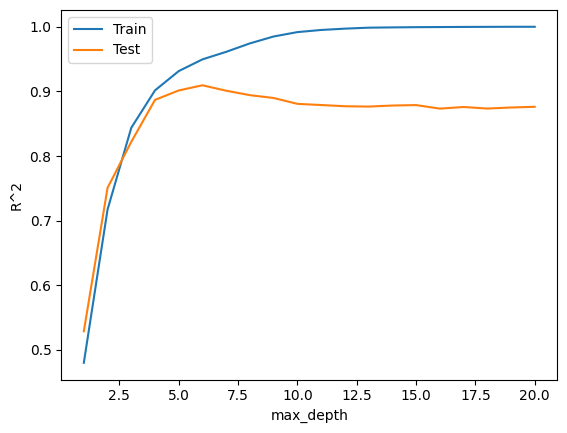

In [95]:
import matplotlib.pyplot as plt

plt.plot(df_tree["max_depth"], df_tree["R2_train"], label="Train")
plt.plot(df_tree["max_depth"], df_tree["R2_test"], label="Test")
plt.xlabel("max_depth")
plt.ylabel("R^2")
plt.legend()
plt.show()

## Parte 7: Aumentar el número de características y regularizar una regresión

El objetivo es examinar el impacto de la regularización de los coeficientes de una regresión a medida que aumenta el número de coeficientes. Utilizamos características polinómicas y técnicas de regularización [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) o [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

**Regularización**: agregar una penalización al modelo (a la función de entrenamiento) para evitar que aprenda demasiado los datos de entrenamiento.
- Lasso (o L1): se penaliza la suma del valor absoluto de los coeficientes.
- Ridge (o L2): se penaliza la suma de los valores cuadrados de los coeficientes.

16. Genere una tabla donde para cada `degree=1..20`, se guarde:
    * número de coeficientes de $\theta$ (igual al número de columnas de $X$)
    * $R^2$ para cada modelo de regresión
    * norma del vector de coeficientes para cada modelo de regresión
    * cantidad de coeficientes no nulos para cada moelo de regresión

    Hint: Arme un dataframe con los datos que le parezcan relevantes para la actividad. Para ello, puede llevar el registro para cada `degree` en la lista `res` de diccionarios que contengan la información relevante de cada uno.

In [96]:
from sklearn.linear_model import Ridge, Lasso
import numpy.linalg as nplin
import numpy

def coef_non_nuls(coef):
    return sum(numpy.abs(coef) > 0.001)

res = []
for d in range(1, 21):
    poly = PolynomialFeatures(degree=d)
    Xtr = poly.fit_transform(X_train)
    reg = LinearRegression().fit(Xtr, y_train)
    rid = Ridge(alpha=0.1).fit(Xtr, y_train)
    las = Lasso(alpha=0.1, max_iter=10000).fit(Xtr, y_train)
    for model, name in zip([reg, rid, las], ["Linear", "Ridge", "Lasso"]):
        coef = model.coef_
        res.append({
            "degree": d,
            "modelo": name,
            "n_coef": len(coef),
            "R2": r2_score(y_test, model.predict(poly.transform(X_test))),
            "norma_coef": nplin.norm(coef),
            "coef_no_nulos": coef_non_nuls(coef)
        })
df_poly = pd.DataFrame(res)

17. Genere un gráfico de $R^2$ de cada modelo (Regresión Lineal, Ridge y Lasso) en función del número de coeficientes, y uno de cantidad de coeficientes no nulos de cada modelo en función del número de coeficientes

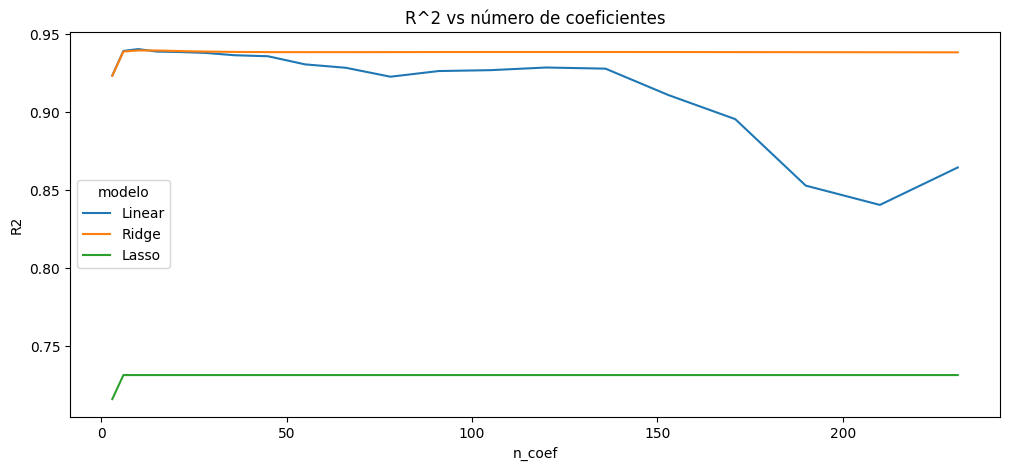

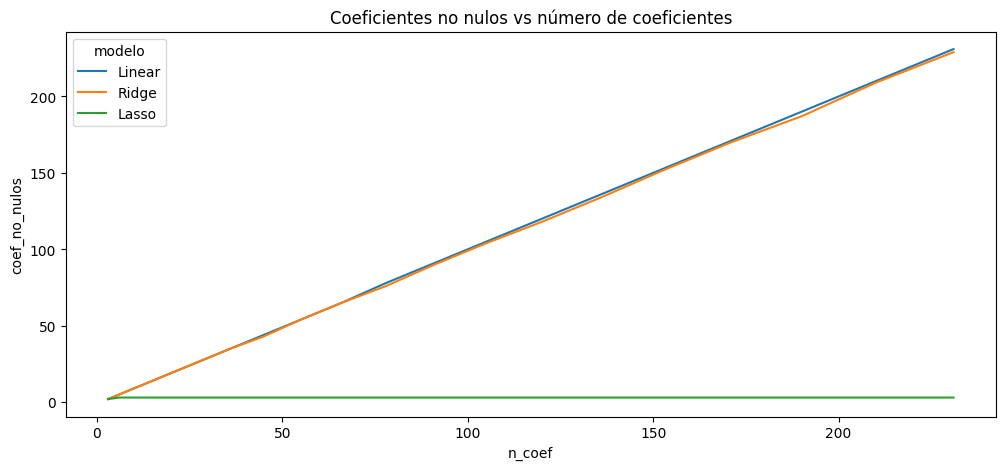

In [97]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=df_poly, x="n_coef", y="R2", hue="modelo")
plt.title("R^2 vs número de coeficientes")
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(data=df_poly, x="n_coef", y="coef_no_nulos", hue="modelo")
plt.title("Coeficientes no nulos vs número de coeficientes")
plt.show()

¿Por qué el desempeño de la regresión lineal cae? ¿Por qué los modelos Ridge y Lasso difieren en la cantidad de coeficientes no nulos?

Cuando usamos regresión lineal polinómica y subimos mucho el grado del polinomio:

- El modelo se vuelve muy complejo.

- Empieza a “memorizar” los datos de entrenamiento en lugar de aprender la tendencia real.

- Se genera un sobreajuste y hace que el modelo funcione peor con datos nuevos (prueba).

Por otro lado, los modelos Ridge y Lasso usan regularización, que pone un “castigo” a los números muy grandes en los coeficientes del modelo:

- Ridge (L2): reduce los coeficientes grandes, pero casi nunca los hace cero.

- Lasso (L1): puede reducir algunos coeficientes a cero, lo que equivale a ignorar algunas variables automáticamente.

Por eso, con el mismo polinomio, Lasso suele terminar con menos variables activas que Ridge.